In [5]:
!pip3 install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/a1/f6/57de91ea40c670527cd47a6548bf2cbedc68cec57c041793b256356abad7/opencv_python-4.8.1.78-cp37-abi3-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 3.5 MB/s eta 0:00:0000:0100:01


In [6]:
!pip3 install numpy

In [7]:
!pip3 install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/85/15/cf99a373812d37f8ae99752a34a9f5f690d820ceb5b302e922705bc18944/tensorflow-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-macos==2.15.0 from https://files.pythonhosted.org/packages/eb/9f/0759e2fea4a3c48f070b64811c2c57036b46353ba87263afc810b8f4188a/tensorflow_macos-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached flatbuffers-23.5.26-py2.py3-no

In [33]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
data_directory = "/Users/krishuppal/Desktop/helmet"
classes = os.listdir(data_directory)
class_to_label = {cls: idx for idx, cls in enumerate(classes)}

image_data_generator = ImageDataGenerator(
    rescale=1.0/255.0, 
    validation_split=0.15  
)

batch_size = 32

In [35]:
train_generator = image_data_generator.flow_from_directory(
    data_directory,
    target_size=(256, 256),  
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = image_data_generator.flow_from_directory(
    data_directory,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

num_classes = len(classes)

class_labels = list(train_generator.class_indices.keys())



Found 651 images belonging to 2 classes.
Found 113 images belonging to 2 classes.


In [36]:
X_train = []
y_train = []
X_validation = []
y_validation = []


for i in range(len(train_generator)):
    batch_images, batch_labels = train_generator[i]
    X_train.extend(batch_images)
    y_train.extend(batch_labels)

for i in range(len(validation_generator)):
    batch_images, batch_labels = validation_generator[i]
    X_validation.extend(batch_images)
    y_validation.extend(batch_labels)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_validation = np.array(X_validation)
y_validation = np.array(y_validation)


In [37]:
X_train.shape

(651, 256, 256, 3)

In [38]:
y_train.shape

(651, 2)

In [39]:
y_train = np.argmax(y_train, axis=1)
y_validation = np.argmax(y_validation, axis=1)

In [40]:
y_train.shape

(651,)

In [41]:
y_train[:30]

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0])

In [42]:
classes=["With Helmet", "Without Helmet"]

In [43]:
import matplotlib.pyplot as plt
def sample_plotter(X, y, index):
    plt.figure(figsize=(30,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

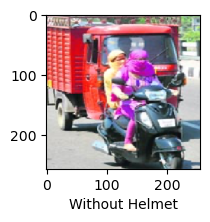

In [44]:
sample_plotter(X_train, y_train,22 )

In [27]:
X_train[0]

array([[[0.427451  , 0.39607847, 0.39607847],
        [0.427451  , 0.39607847, 0.39607847],
        [0.427451  , 0.39607847, 0.3921569 ],
        ...,
        [0.4156863 , 0.38431376, 0.38431376],
        [0.39607847, 0.3647059 , 0.3647059 ],
        [0.36078432, 0.32941177, 0.32941177]],

       [[0.43137258, 0.40000004, 0.40000004],
        [0.43137258, 0.40000004, 0.40000004],
        [0.42352945, 0.3921569 , 0.38823533],
        ...,
        [0.41176474, 0.3803922 , 0.3803922 ],
        [0.40000004, 0.36862746, 0.36862746],
        [0.4039216 , 0.37254903, 0.37647063]],

       [[0.41960788, 0.38823533, 0.38823533],
        [0.41960788, 0.38823533, 0.38823533],
        [0.42352945, 0.3921569 , 0.38823533],
        ...,
        [0.41176474, 0.3803922 , 0.3803922 ],
        [0.4039216 , 0.37254903, 0.37254903],
        [0.38823533, 0.35686275, 0.35686275]],

       ...,

       [[0.32941177, 0.3254902 , 0.38823533],
        [0.38823533, 0.38431376, 0.44705886],
        [0.43921572, 0

In [45]:
import tensorflow as tf
from tensorflow.keras import layers, models
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(5, activation='sigmoid')
])

In [47]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [48]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
21/21 [==============================] - 14s 632ms/step - loss: 3.2516 - accuracy: 0.5438
Epoch 2/10
21/21 [==============================] - 13s 640ms/step - loss: 0.8359 - accuracy: 0.5929
Epoch 3/10
21/21 [==============================] - 13s 631ms/step - loss: 0.7393 - accuracy: 0.6344
Epoch 4/10
21/21 [==============================] - 13s 619ms/step - loss: 0.6638 - accuracy: 0.6636
Epoch 5/10
21/21 [==============================] - 13s 633ms/step - loss: 0.6031 - accuracy: 0.7066
Epoch 6/10
21/21 [==============================] - 14s 636ms/step - loss: 0.5430 - accuracy: 0.7481
Epoch 7/10
21/21 [==============================] - 13s 629ms/step - loss: 0.4582 - accuracy: 0.7711
Epoch 8/10
21/21 [==============================] - 13s 617ms/step - loss: 0.3886 - accuracy: 0.8372
Epoch 9/10
21/21 [==============================] - 13s 589ms/step - loss: 0.2667 - accuracy: 0.9002
Epoch 10/10
21/21 [==============================] - 12s 589ms/step - loss: 0.2488 - accura

In [49]:
cnn.evaluate(X_validation, y_validation)

4/4 [==============================] - 1s 165ms/step - loss: 0.5921 - accuracy: 0.7611


[0.5920947194099426, 0.76106196641922]

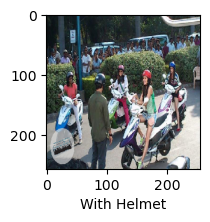

In [56]:
sample_plotter(X_validation, y_validation,13 )

In [51]:
y_pred=cnn.predict(X_validation)

4/4 [==============================] - 1s 172ms/step


In [52]:
np.argmax(y_pred[0])

0

In [53]:
pred_classes=[np.argmax(element) for element in y_pred]
pred_classes[:60]

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

In [54]:
y_validation[:20]

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

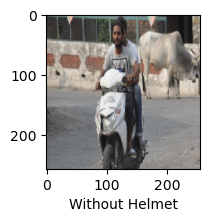

In [57]:
sample_plotter(X_validation, pred_classes, 2)